In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import ipywidgets as widgets  

In [3]:
# Load the dataset
data = pd.read_csv('spam.csv')

In [4]:
# 1. Data Cleaning
print(data.head())
print(data.info())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [5]:
# Dropping unnecessary columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
# Renaming columns for clarity
data.rename(columns={'v1': 'Label', 'v2': 'Email_Text'}, inplace=True)

In [7]:

# Encoding target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

In [8]:
# Checking for missing values and duplicates
print(data.isna().sum())
print(data.duplicated().sum())

Label         0
Email_Text    0
dtype: int64
409


In [9]:
# Dropping duplicate entries
data.drop_duplicates(keep='first', inplace=True)

Label
0    4516
1     647
Name: count, dtype: int64


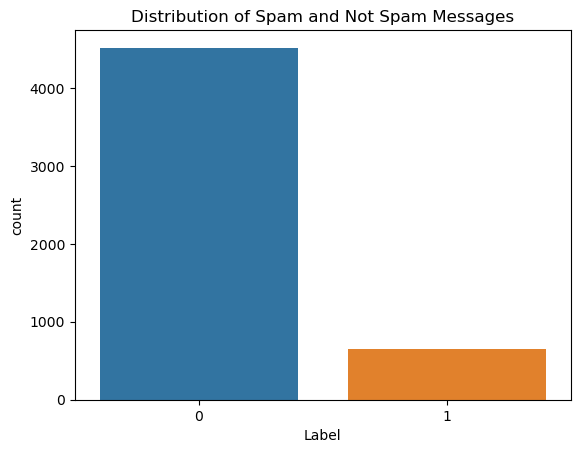

In [10]:
# 2. Data Visualization
print(data['Label'].value_counts())
sns.countplot(x='Label', data=data)
plt.title('Distribution of Spam and Not Spam Messages')
plt.show()

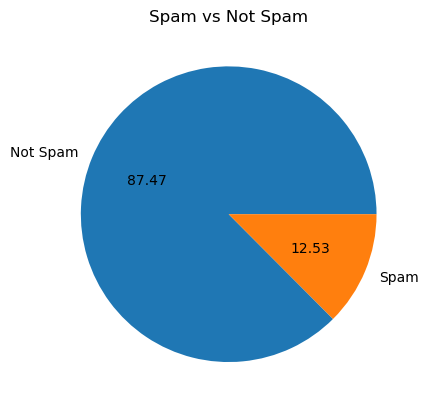

In [11]:
# Pie chart representation of spam distribution
plt.pie(data['Label'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")
plt.title('Spam vs Not Spam')
plt.show()

In [12]:

# Text analysis features creation
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
data['Char_Count'] = data['Email_Text'].apply(len)  # Number of characters in an email
data['Word_Count'] = data['Email_Text'].apply(lambda x: len(nltk.word_tokenize(x)))  # Number of words in an email
data['Sentence_Count'] = data['Email_Text'].apply(lambda x: len(nltk.sent_tokenize(x)))  # Number of sentences in an email


In [14]:
# Descriptive statistics for spam and not spam messages
print(data[data['Label'] == 0][['Char_Count', 'Word_Count', 'Sentence_Count']].describe())
print(data[data['Label'] == 1][['Char_Count', 'Word_Count', 'Sentence_Count']].describe())

        Char_Count   Word_Count  Sentence_Count
count  4516.000000  4516.000000     4516.000000
mean     70.428919    17.123782        1.820195
std      56.356310    13.493970        1.383657
min       2.000000     1.000000        1.000000
25%      34.000000     8.000000        1.000000
50%      52.000000    13.000000        1.000000
75%      90.000000    22.000000        2.000000
max     910.000000   220.000000       38.000000
       Char_Count  Word_Count  Sentence_Count
count  647.000000  647.000000      647.000000
mean   137.318393   27.659969        2.967543
std     30.096861    7.038065        1.490069
min     13.000000    2.000000        1.000000
25%    130.000000   25.000000        2.000000
50%    148.000000   29.000000        3.000000
75%    157.000000   32.000000        4.000000
max    223.000000   46.000000        9.000000


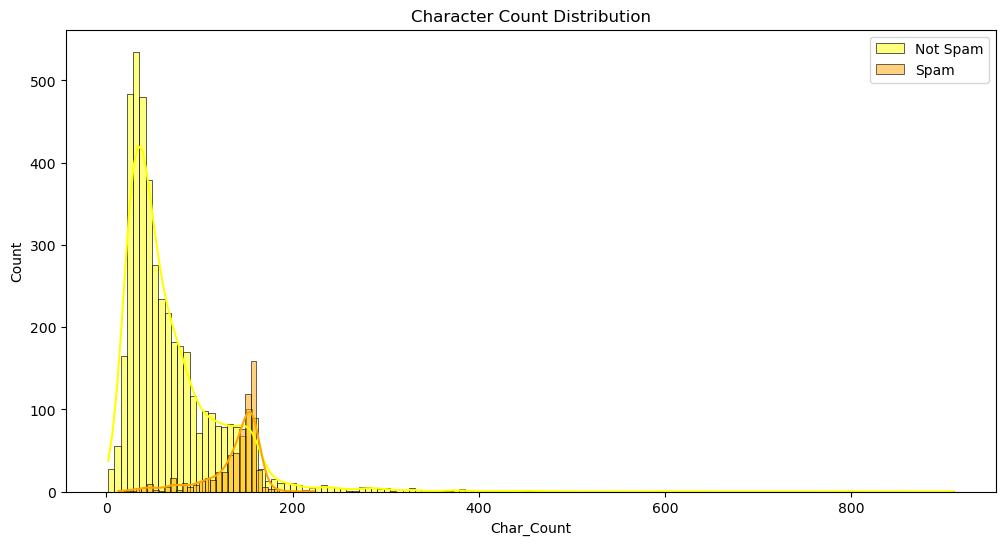

In [15]:
# Visualizing character and word counts using histograms
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Label'] == 0]['Char_Count'], color='yellow', label='Not Spam', kde=True)
sns.histplot(data[data['Label'] == 1]['Char_Count'], color='orange', label='Spam', kde=True)
plt.title('Character Count Distribution')
plt.legend()
plt.show()

In [16]:
# Function to preprocess text data
def preprocess_text(text):
    text = text.lower()  # Lower case conversion
    tokens = nltk.word_tokenize(text)  # Tokenization
        # Removing special characters and stop words, stemming the words
    tokens = [PorterStemmer().stem(word) for word in tokens if word.isalnum() and word not in stopwords.words('english')]
        
    return " ".join(tokens)

In [17]:
# Applying the text transformation function to the dataset
data['Processed_Text'] = data['Email_Text'].apply(preprocess_text)

In [18]:
# Word Cloud Creation for Spam and Not Spam Messages
from wordcloud import WordCloud


In [19]:
spam_wc = WordCloud(width=1500, height=800, min_font_size=10, background_color='white').generate(" ".join(data[data['Label']==1]['Processed_Text']))
non_spam_wc = WordCloud(width=1500, height=800, min_font_size=10, background_color='white').generate(" ".join(data[data['Label']==0]['Processed_Text']))

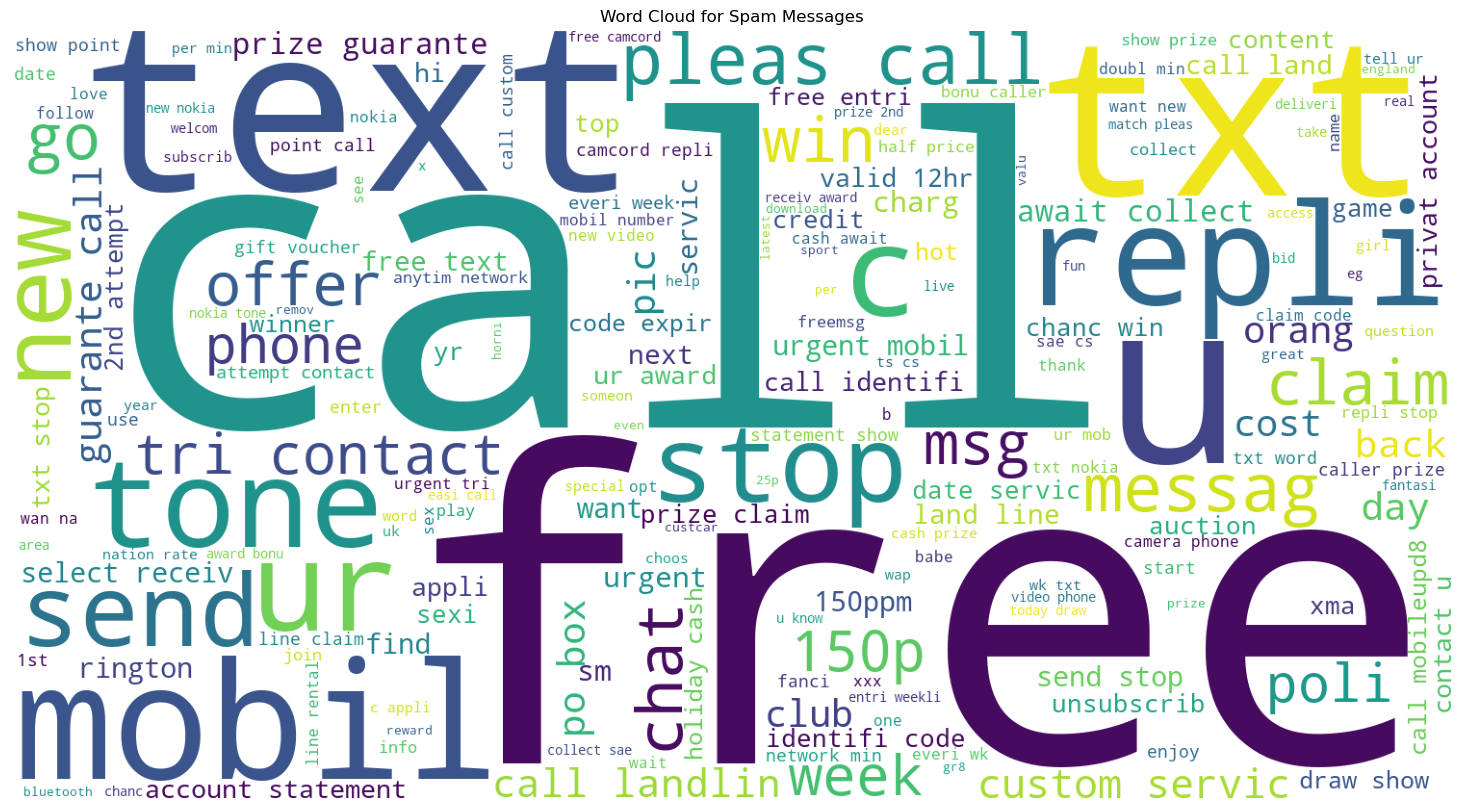

In [20]:
plt.figure(figsize=(20, 10))
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

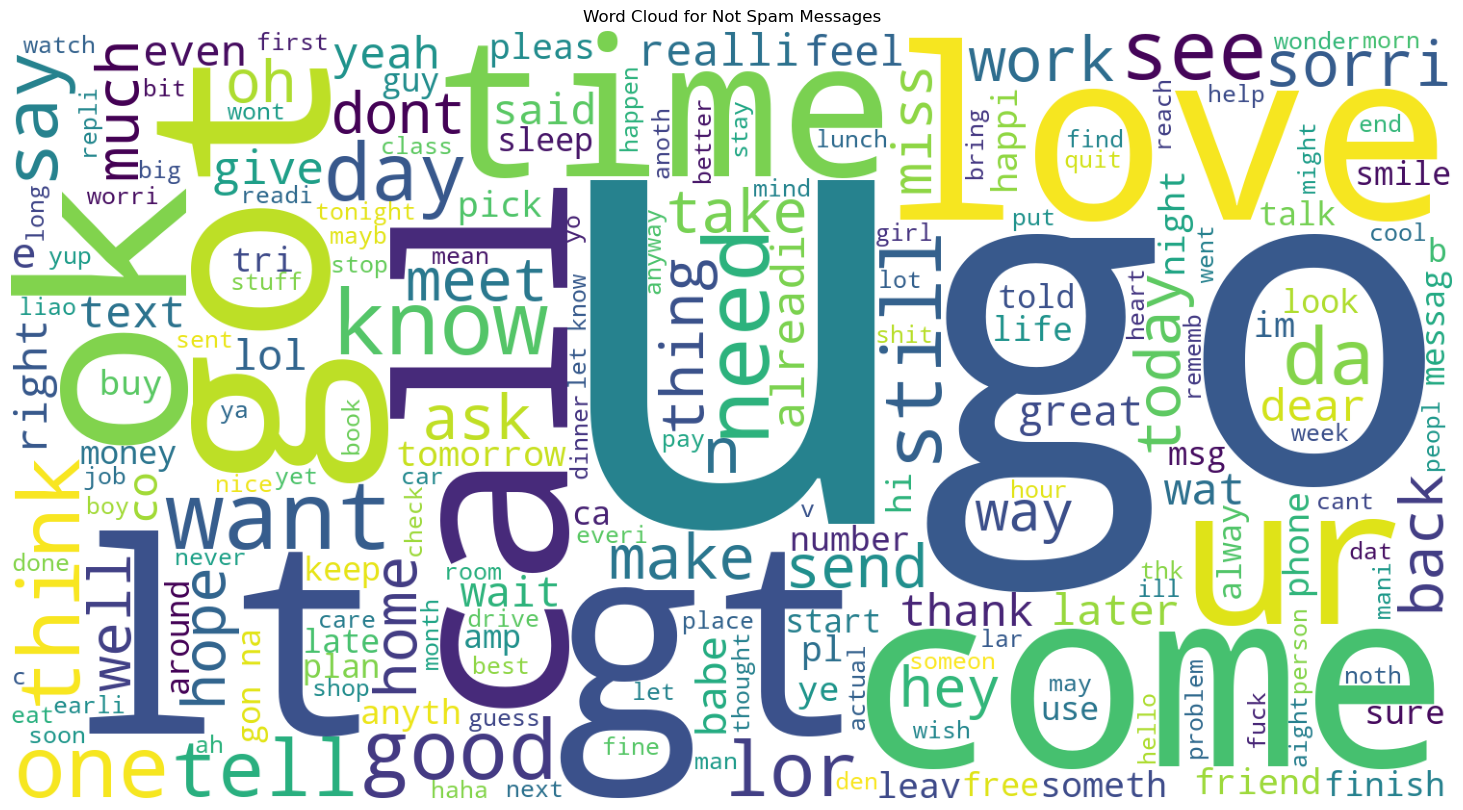

In [21]:
plt.figure(figsize=(20, 10))
plt.imshow(non_spam_wc)
plt.axis('off')
plt.title('Word Cloud for Not Spam Messages')
plt.show()

In [22]:

# Preparing data for model building using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Processed_Text'])
y = data['Label']

In [23]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:

# Model Training using Naive Bayes Classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [25]:

# Evaluating model performance on the test set
accuracy = naive_bayes_model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.96


In [26]:
# Create a function to classify an email input by the user
def classify_email(email_text):
    processed_email = preprocess_text(email_text)
    email_vectorized = vectorizer.transform([processed_email])
    prediction = naive_bayes_model.predict(email_vectorized)
    
    if prediction[0] == 1:
        return "This email is classified as **Spam**."
    else:
        return "This email is classified as **Not Spam**."


In [27]:
import joblib

In [28]:
# Save the model and vectorizer to disk
joblib.dump(naive_bayes_model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [29]:
# Create a simple GUI using ipywidgets
email_input = widgets.Textarea(
    description='Email:',
    placeholder='Type your email content here...',
    layout=widgets.Layout(width='100%', height='150px')
)

classify_button = widgets.Button(description='Classify Email')

output_area = widgets.Output()

def on_classify_button_clicked(b):
    with output_area:
        output_area.clear_output()  
        result = classify_email(email_input.value)
        print(result)

classify_button.on_click(on_classify_button_clicked)

# Display the GUI elements in the notebook
display(email_input, classify_button, output_area)

Textarea(value='', description='Email:', layout=Layout(height='150px', width='100%'), placeholder='Type your e…

Button(description='Classify Email', style=ButtonStyle())

Output()